In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 준비

In [3]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000,
                    shuffle=True,
                    noise=0.05,
                    random_state=0,
                    factor=0.5)

df = pd.DataFrame(X, columns=['feature1', 'feature2'])

df.head()

,feature1,feature2
0,0.519781,-0.015981
1,-0.057719,-0.420279
2,-0.805155,-0.662227
3,0.316549,0.312730
4,-0.304804,0.407563


Scikit-learn 라이브러리를 사용하여 두 개의 동심원 형태를 띠는 2차원 분류 데이터셋을 생성

- make_circles: 두 개의 클래스가 두 개의 동심원 형태로 흩어져 있는 데이터셋을 생성  
 이는 선형적으로 구분할 수 없는(non-linearly separable) 대표적인 데이터

    - X: 생성된 특징(Feature) 데이터, 1000개의 행과 2개의 열(특징1, 특징2)을 가진 NumPy 배열
    - y: 각 데이터 포인트의 **정답 레이블(Label)**, 안쪽 원 또는 바깥쪽 원을 나타내는 클래스(0 또는 1)로 구성된 NumPy 배열

- noise=0.05: 데이터 포인트에 약간의 잡음을 추가하여 원 경계를 조금 흐트러뜨림 (노이즈가 0이면 완벽한 원)

- factor=0.5: 안쪽 원의 반지름이 바깥쪽 원 반지름의 0.5배가 되도록 설정

- feature1은 x좌표, feature2는 y좌표로 단순히 데이터셋의 2차원 공간에서 각 데이터 포인트의 위치를 나타내는 가로 좌표와 세로 좌표에 붙인 이름

In [4]:
# make_circles 데이터셋의 중심 좌표
data_center = np.mean(X, axis=0)    # axis=0은 각 열(feature)에 대한 평균을 계산

print("데이터셋의 평균 중심 좌표 (feature1 평균, feature2 평균):")
print(data_center)

데이터셋의 평균 중심 좌표 (feature1 평균, feature2 평균):
[ 0.0006108  -0.00062919]


- 클러스터링(군집화)을 수행하지 않았으므로 데이터셋 전체의 중심을 구함

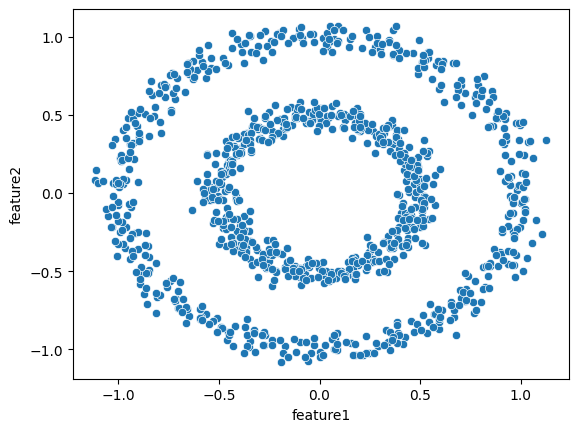

In [5]:
sns.scatterplot(data=df, x='feature1', y='feature2')
plt.show()

- make_circles 함수는 가장 큰 원의 반지름을 기본적으로 $r=1$로 가정하고 데이터를 생성 (중심이 원점 0,0에 위치)
    - 즉, 이 원 위의 점들의 $x$ 좌표(feature1)와 $y$ 좌표(feature2)는 최소 **$-1$**에서 최대 $1$ 사이에 분포

- factor = 0.5로 설정해서 안쪽 원의 반지름은 바깥쪽 원의 반지름의 0.5배, 즉 $r=0.5$
    - 즉, 이 원 위의 점들의 $x$ 좌표(feature1)와 $y$ 좌표(feature2)는 최소 **$-0.5$**에서 최대 $0.5$ 사이에 분포

- noise=0.05를 설정했기 때문에 극히 일부 점은 $-1$을 아주 살짝 밑돌거나 $1$을 아주 살짝 넘길 수는 있음

### k-means clustering

In [6]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, n_init='auto', random_state=0)
df['kmeans'] = km.fit_predict(X)

df.head()

,feature1,feature2,kmeans
0,0.519781,-0.015981,0
1,-0.057719,-0.420279,0
2,-0.805155,-0.662227,1
3,0.316549,0.312730,0
4,-0.304804,0.407563,1


원형 데이터셋에 K-평균 군집화(K-Means Clustering) 알고리즘을 적용

- n_clusters=2: 데이터를 2개의 군집으로 나누도록 설정 (이는 두 개의 동심원이기 때문에 자연스러운 선택)  
- n_init='auto': 초기 중심점 설정을 여러 번 반복하는 횟수를 자동으로 설정 (경고 메시지를 피하기 위해 최신 버전에서 권장되는 설정)  
- km.fit_predict(X): 모델을 특징 데이터 X에 대해 학습(fit) 시키고,    
        동시에 각 데이터 포인트가 어떤 군집(0, 1)에 속하는지 예측(predict)하여 군집 레이블을 반환

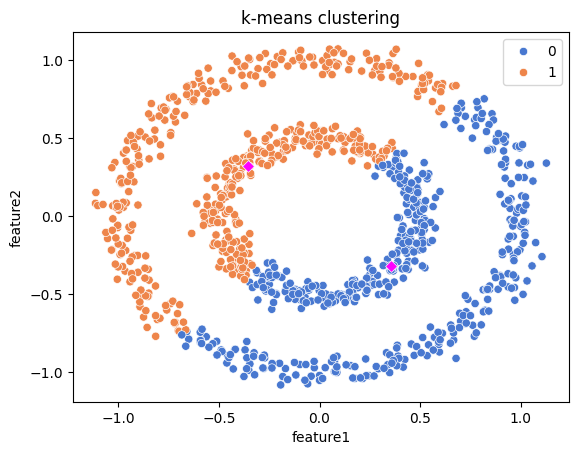

In [7]:
sns.scatterplot(df, x='feature1', y='feature2', hue='kmeans', palette='muted')      # 군집화 결과 시각화
sns.scatterplot(x=km.cluster_centers_[:,0], y=km.cluster_centers_[:,1],     # 군집 중심점 시각화
                marker='D', color='magenta')
plt.title('k-means clustering')
plt.show()

In [8]:
# K-Means 군집화 모델이 계산한 중심점의 좌표
km.cluster_centers_

array([[ 0.35389106, -0.3196665 ],
       [-0.35693441,  0.32225967]])

- K-Means 클러스터링 결과는 잘못된(부적합한) 결과

🧐 K-Means 결과가 부적합한 이유

K-Means는 원형(비볼록) 데이터 구조를 제대로 처리하지 못하는, 알고리즘의 **근본적인 약점**을 보여줌

1. **군집의 실제 구조**: 데이터는 **안쪽 원**과 **바깥쪽 원**이라는 두 개의 독립된 원형 군집으로 구성되어 있음

2. **K-Means의 작동 방식**: K-Means는 각 데이터 포인트를 **유클리드 거리**가 가장 가까운 중심점(Centroid)에 할당  
K-Means는 군집의 모양을 **구형(Spherical)**, 즉 **볼록한(Convex)** 형태로 가정

3. 결과: 그림에서 볼 수 있듯이, K-Means는 두 개의 중심점을 기준으로 공간을 **선형적으로 나누는 경향**을 보임  
그 결과, 작은 원이 주황색과 파란색으로 반반 나뉘고, 큰 원 역시 주황색과 파란색으로 반반 나뉘어  
 **원래의 동심원 구조(안쪽 원 vs. 바깥쪽 원)**를 인식하지 못했음

따라서 K-Means는 **수학적으로는 중심점을 계산**했지만, **클러스터링 관점에서는 데이터의 실제 군집 구조를 파악하는 데 실패**함
 
그 대안으로 밀도 기반 알고리즘인 DBSCAN이 이 데이터셋에 더 적합함

### DBSCAN

- 밀도 기반 군집화 알고리즘 (K-Means는 거리 기반 알고리즘)
- 데이터의 밀도를 기준으로 군집을 정의하며, 잡음(Noise)이나 특이점(Outlier)을 효과적으로 분리해낼 수 있음

<br>

| 특징 | 설명 |
| :--- | :--- |
| **밀도 기반** | 데이터 포인트가 특정 밀도 이상으로 모여있는 영역을 하나의 군집으로 간주 |
| **군집 개수 불필요** | K-Means와 달리, 사전에 군집의 개수($k$)를 지정할 필요 없음 <br> 알고리즘이 자동으로 밀집된 영역의 개수를 찾아냄 |
| **잡음 처리** | 밀집 영역에 속하지 않는 데이터 포인트를 **잡음(Noise)**으로 분류 |
| **임의의 형태** | 원형이 아닌 달 모양(make_moons)이나 복잡한 형태의 군집도 잘 찾아냄 <br> (이는 동심원 데이터에 K-Means보다 유리할 수 있음) |

<br>

- 주요 파라미터
1. **Epsilon**: 한 점을 중심으로 하는 반경의 크기

2. **MinPts**: 민포인트, 입실론 주변 영역 내에 포함되어야 할 최소 데이터 포인트 수 (자기자신 포함)

- DBSCAN의 핵심 개념 세 가지
1. **핵심 포인트 (Core Point)**: 특정 반경 $R$ (eps) 내에 최소 개수 $M$ (min_samples) 이상의 이웃을 가지고 있는 데이터 포인트

2. **경계 포인트 (Border Point)**: 핵심 포인트의 반경 내에 있지만, 스스로는 핵심 포인트가 아닌 데이터 포인트

3. **잡음/특이점 (Noise Point)**: 핵심 포인트도, 경계 포인트도 아닌 데이터 포인트 (이상치로 간주)

<br>

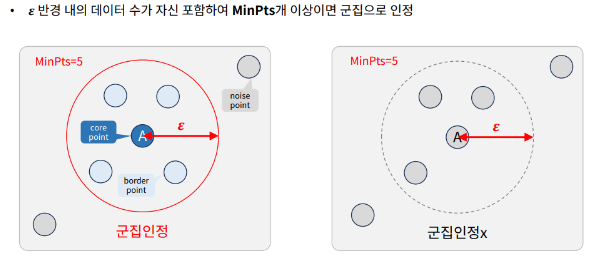

- 알고리즘 작동 방식

1. 임의의 포인트에서 시작하여 입실론 반경 내의 이웃을 찾음

2. 이웃의 수가 MinPts 이상이면 새로운 클러스터를 형성

3. 클러스터에 속한 모든 포인트에 대해 같은 과정을 반복하여 클러스터를 확장

4. 모든 포인트를 처리할 때까지 1~3 과정을 반복

- 장점

1. 클러스터 개수를 사전에 지정할 필요가 없음

2. 불규칙한 모양의 클러스터도 찾아냄

3. 이상치(Noise)를 효과적으로 식별

- 한계

1. 밀도가 다양한(밀도가 오밀조밀한 클러스터와 듬성듬성한 클러스터가 함께 존재하는 경우) 클러스터를 처리하기 어려울 수 있음

2. 고차원 데이터에서는 성능이 저하될 수 있음

3. 입실론과 MinPts 파라미터 선택에 결과에 큰 영향을 미침

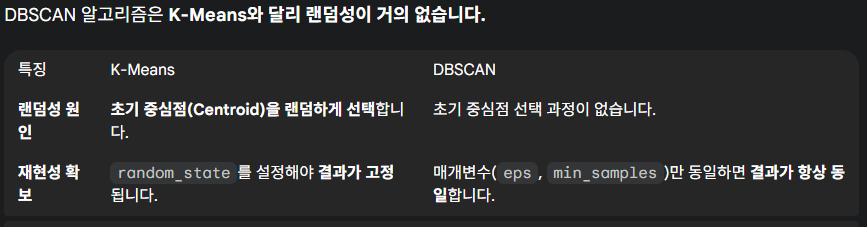

In [9]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2,
                min_samples=10)
df['dbscan'] = dbscan.fit_predict(X)
df.head()

,feature1,feature2,kmeans,dbscan
0,0.519781,-0.015981,0,0
1,-0.057719,-0.420279,0,0
2,-0.805155,-0.662227,1,1
3,0.316549,0.312730,0,0
4,-0.304804,0.407563,1,0


- eps=0.2: 최대 반경(Epsilon, $\epsilon$) 설정, 한 점을 중심으로 반경 $0.2$ 이내의 거리에 있는 점들을 이웃으로 간주  
 (이 값이 군집의 밀도를 결정하는 중요한 기준이 됨)
 
- min_samples=10: 최소 이웃 개수(M) 설정, 반경 $0.2$ 내에 최소한 10개 이상의 이웃이 있어야 해당 점이 핵심 포인트로 간주

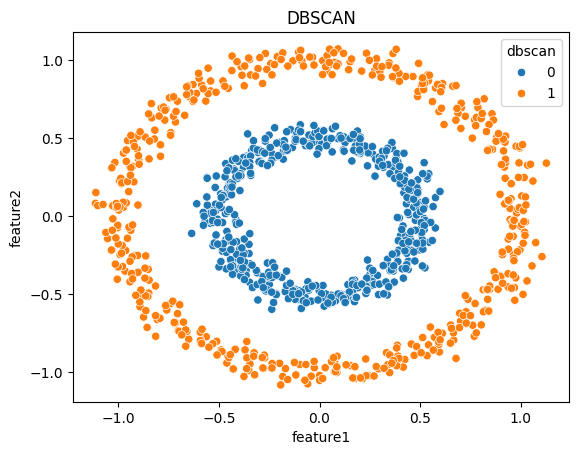

In [10]:
sns.scatterplot(df, x='feature1', y='feature2', hue='dbscan')
plt.title('DBSCAN')
plt.show()

- DBSCAN은 K-Means와는 다르게 명확한 군집 중심점(Centroid)을 계산하지 않음

- DBSCAN은 밀도 기반 군집이므로 핵심 포인트, 경계 포인트, 잡음으로 분류할 뿐 특정 지점을 대표 중심점으로 뽑아내지는 않음

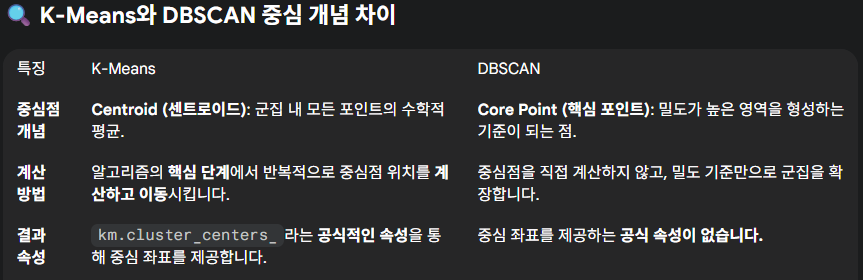

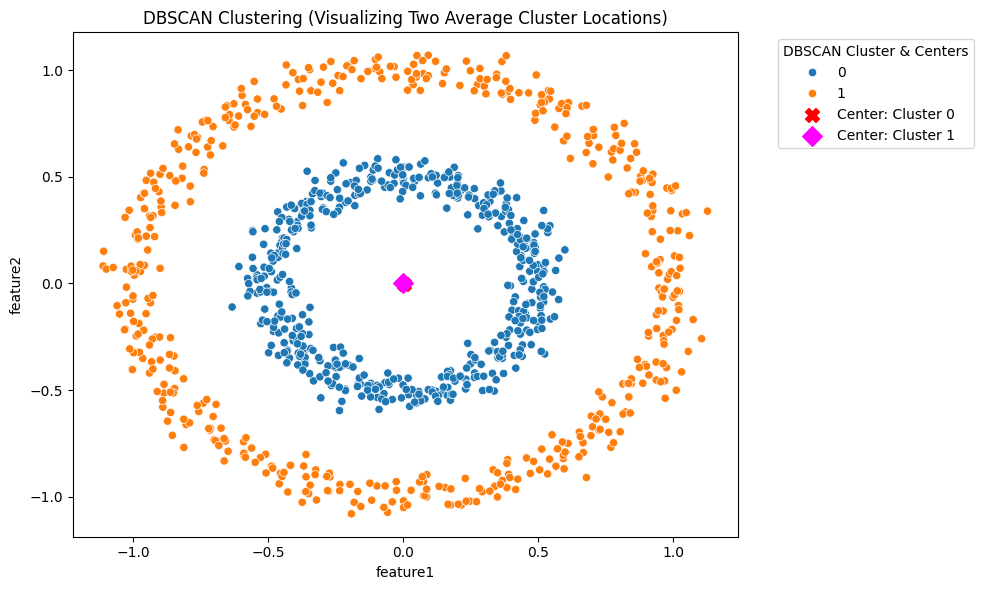

In [11]:
# 임의로 DBSCAN의 각 군집에 속한 데이터 포인트들의 군집별 평균 좌표 시각화

# 1. 데이터 포인트 시각화 (Hue: dbscan 레이블)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='feature1', y='feature2', hue='dbscan')

# 2. 각 군집의 평균 위치 계산 및 시각화
unique_labels = df['dbscan'].unique()   # 중복되지 않는 모든 값(고유한 레이블)만 가져옴

# 군집 마커 스타일 정의
markers = ['X', 'D'] # 군집 0, 군집 1에 사용할 마커 모양
colors = ['red', 'magenta'] # 군집 0, 군집 1에 사용할 마커 색상

marker_index = 0
for label in unique_labels:     # 반복문이 없으면, 우리가 몇 개의 군집이 생겼는 지 알 수 없음, 각 군집별로 정확히 평균 위치 계산
    if label == -1: 
        continue # 잡음(-1)은 제외
    
    # 해당 군집에 속하는 데이터 포인트만 선택
    cluster_points = df[df['dbscan'] == label]
    
    # 평균 좌표 계산
    cluster_center = np.mean(cluster_points[['feature1', 'feature2']], axis=0)
    
    # 계산된 평균 위치를 별도의 마커로 시각화
    plt.scatter(cluster_center['feature1'], cluster_center['feature2'], 
                marker=markers[marker_index], # 군집별로 다른 마커 사용
                s=100,      # 마커 크기를 크게 설정
                color=colors[marker_index], 
                label=f'Center: Cluster {label}') # 범례에 표시될 이름 지정
    
    marker_index += 1 # 다음 군집을 위해 마커/색상 인덱스 증가

# 3. 그래프 설정 및 출력
plt.title('DBSCAN Clustering (Visualizing Two Average Cluster Locations)')
plt.xlabel('feature1')
plt.ylabel('feature2')
# loc='upper left'로 설정하고, bbox_to_anchor로 위치를 조정하여 겹치지 않게 합니다.
plt.legend(title='DBSCAN Cluster & Centers', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [12]:
# DBSCAN의 각 군집에 속한 데이터 포인트들의 군집별 평균 좌표

unique_labels = df['dbscan'].unique()   # 중복되지 않는 모든 값(고유한 레이블)만 추출

for label in unique_labels:
    if label == -1:
        print(f"레이블 -1 (잡음): 평균 위치를 계산하지 않음")
        continue

    cluster_points = df[df['dbscan'] == label]
    
    # 해당 군집의 평균 좌표 계산
    cluster_center = np.mean(cluster_points[['feature1', 'feature2']], axis=0)
    
    # 평균 위치 출력 (2개의 중심점이 출력되어야 함)
    print(f"군집 {label}의 평균 위치:")
    print(f"feature1: {cluster_center['feature1']:.4f}, feature2: {cluster_center['feature2']:.4f}")
    print("-" * 20)

군집 0의 평균 위치:
feature1: 0.0018, feature2: -0.0017
--------------------
군집 1의 평균 위치:
feature1: -0.0006, feature2: 0.0005
--------------------


DBSCAN은 밀도를 기준으로 군집을 찾았기 때문에, 안쪽 원 전체와 바깥쪽 원 전체를 각각 하나의 온전한 군집으로 정확하게 인식함

바깥 원 (군집 1): 중심이 $(0, 0)$ / 안쪽 원 (군집 0): 중심이 $(0, 0)$

두 군집 모두 원점을 중심으로 대칭적인 도넛(Ring) 모양으로 분포함

따라서 각 군집에 속한 모든 점들의 평균 위치를 계산하면, 그 평균 위치는 두 군집 모두 원점 $(0, 0)$에 수렴